## **Title**

**Personalized Education Analytics for Online Learning Platforms**

## **Objective**

Analyse user engagement and learning outcomes, and recommend personalized content or learning paths

This notebook focuses on:

*   Cleaning the dataset
*   Handling missing values and data types
*   Perform exploratory data analysis to uncover patterns and insights from the dataset

## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **Load datasets**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load datasets

df = pd.read_csv('/content/drive/MyDrive/personalized_learning_dataset.csv')

## **Initial Data Overview**

### Shape of the dataset

In [ ]:
df.shape

(10000, 15)

Rows: 10,000

Columns: 15

### Basic Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  10000 non-null  object
 1   Age                         10000 non-null  int64 
 2   Gender                      10000 non-null  object
 3   Education_Level             10000 non-null  object
 4   Course_Name                 10000 non-null  object
 5   Time_Spent_on_Videos        10000 non-null  int64 
 6   Quiz_Attempts               10000 non-null  int64 
 7   Quiz_Scores                 10000 non-null  int64 
 8   Forum_Participation         10000 non-null  int64 
 9   Assignment_Completion_Rate  10000 non-null  int64 
 10  Engagement_Level            10000 non-null  object
 11  Final_Exam_Score            10000 non-null  int64 
 12  Learning_Style              10000 non-null  object
 13  Feedback_Score              10000 non-null  int

### Summary Statistics

In [ ]:
df.describe(include = 'all')

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
count,10000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000,10000.000000,10000
unique,10000,NaN,3,3,5,NaN,NaN,NaN,NaN,NaN,3,NaN,4,NaN,2
top,S09984,NaN,Female,Undergraduate,Machine Learning,NaN,NaN,NaN,NaN,NaN,Medium,NaN,Reading/Writing,NaN,No
freq,1,NaN,4886,5070,2043,NaN,NaN,NaN,NaN,NaN,4927,NaN,2554,NaN,8043
mean,NaN,32.137700,NaN,NaN,NaN,255.375400,2.500500,64.578600,24.616200,69.546800,NaN,64.697000,NaN,3.012600,NaN
std,NaN,10.062647,NaN,NaN,NaN,141.656392,1.122642,20.289125,14.330305,17.360782,NaN,20.096417,NaN,1.421423,NaN
min,NaN,15.000000,NaN,NaN,NaN,10.000000,1.000000,30.000000,0.000000,40.000000,NaN,30.000000,NaN,1.000000,NaN
25%,NaN,24.000000,NaN,NaN,NaN,131.000000,1.000000,47.000000,12.000000,54.000000,NaN,47.000000,NaN,2.000000,NaN
50%,NaN,32.000000,NaN,NaN,NaN,257.000000,3.000000,65.000000,25.000000,69.000000,NaN,65.000000,NaN,3.000000,NaN
75%,NaN,41.000000,NaN,NaN,NaN,378.000000,4.000000,82.000000,37.000000,85.000000,NaN,82.000000,NaN,4.000000,NaN


### Unique Values

In [ ]:
df.nunique()

,0
Student_ID,10000
Age,35
Gender,3
Education_Level,3
Course_Name,5
Time_Spent_on_Videos,490
Quiz_Attempts,4
Quiz_Scores,70
Forum_Participation,50
Assignment_Completion_Rate,60


### Unique Values of each column

In [ ]:
unique_values = {col: df[col].unique() for col in df.columns}
unique_values

{'Student_ID': array(['S00001', 'S00002', 'S00003', ..., 'S09998', 'S09999', 'S10000'],
       dtype=object),
 'Age': array([15, 49, 20, 37, 34, 45, 47, 48, 29, 35, 16, 44, 24, 38, 40, 28, 23,
        30, 26, 17, 42, 25, 21, 46, 33, 31, 18, 43, 19, 39, 32, 27, 41, 22,
        36]),
 'Gender': array(['Female', 'Male', 'Other'], dtype=object),
 'Education_Level': array(['High School', 'Undergraduate', 'Postgraduate'], dtype=object),
 'Course_Name': array(['Machine Learning', 'Python Basics', 'Data Science',
        'Web Development', 'Cybersecurity'], dtype=object),
 'Time_Spent_on_Videos': array([171, 156, 217, 489, 496, 184, 454, 425, 359, 263, 247,  25, 190,
        240, 157, 312, 239, 150, 297, 409, 222,  96, 338, 452, 295, 371,
        309, 484,  67, 408, 276,  74, 350, 321,  83,  77, 435, 258, 227,
        138,  66, 314, 405, 214, 143, 122,  10, 246,  63, 460, 116, 360,
        353, 471, 391, 412, 212, 147, 388, 316, 415, 279, 376, 356, 133,
        131, 458, 207, 136, 449, 433,  7

### Duplicate Rows

In [ ]:
df.duplicated().sum()

np.int64(0)

### First few rows

In [ ]:
df.head()

,Student_ID,Age,Gender,Education_Level,Course_Name,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Engagement_Level,Final_Exam_Score,Learning_Style,Feedback_Score,Dropout_Likelihood
0,S00001,15,Female,High School,Machine Learning,171,4,67,2,89,Medium,51,Visual,1,No
1,S00002,49,Male,Undergraduate,Python Basics,156,4,64,0,94,Medium,92,Reading/Writing,5,No
2,S00003,20,Female,Undergraduate,Python Basics,217,2,55,2,67,Medium,45,Reading/Writing,1,No
3,S00004,37,Female,Undergraduate,Data Science,489,1,65,43,60,High,59,Visual,4,No
4,S00005,34,Female,Postgraduate,Python Basics,496,3,59,34,88,Medium,93,Visual,3,No


### **Insights**

1. The dataset contains the anonymized records for 10,000 students.

2. The dataset has 15 features for each student

3. No missing values has been reported

4. There are no duplicate rows

5. A mix of numerical and categorical features are present

## **Dataset Schema**



| Column                       | Description                                              | Type     | Example           |
|-----------------------------|----------------------------------------------------------|----------|-------------------|
| `student_id`                | Unique identifier for each student                       | object   | "S00001"          |
| `age`                       | Age of the student                                       | int      | 20                |
| `gender`                    | Gender of the student                                    | object   | "Male"            |
| `education_level`           | Education level attained                                 | object   | "Undergraduate"   |
| `course_name`               | Enrolled course                                          | object   | "Python Basics"   |
| `time_spent_on_videos`      | Minutes of video watched                                 | int      | 217               |
| `quiz_attempts`             | Total quiz attempts                                      | int      | 3                 |
| `quiz_scores`               | Average quiz score (in %)                                | int      | 64                |
| `forum_participation`       | Forum posts or responses made                            | int      | 2                 |
| `assignment_completion_rate`| % of assignments completed                               | int      | 89                |
| `engagement_level`          | Engagement tier based on activity                        | object   | "Medium"          |
| `final_exam_score`          | Final exam score (%)                                     | int      | 92                |
| `learning_style`            | Preferred learning style                                 | object   | "Visual"          |
| `feedback_score`            | Course rating given by the student (1–5)                 | int      | 4                 |
| `dropout_likelihood`        | Likelihood of dropout                                    | object   | "No"              |


## **Data Cleaning**

In [ ]:
# Standardize Column Names
df.columns = df.columns.str.lower().str.replace(' ', '_')

## **Univariate Analysis**

### **Numeric Features**

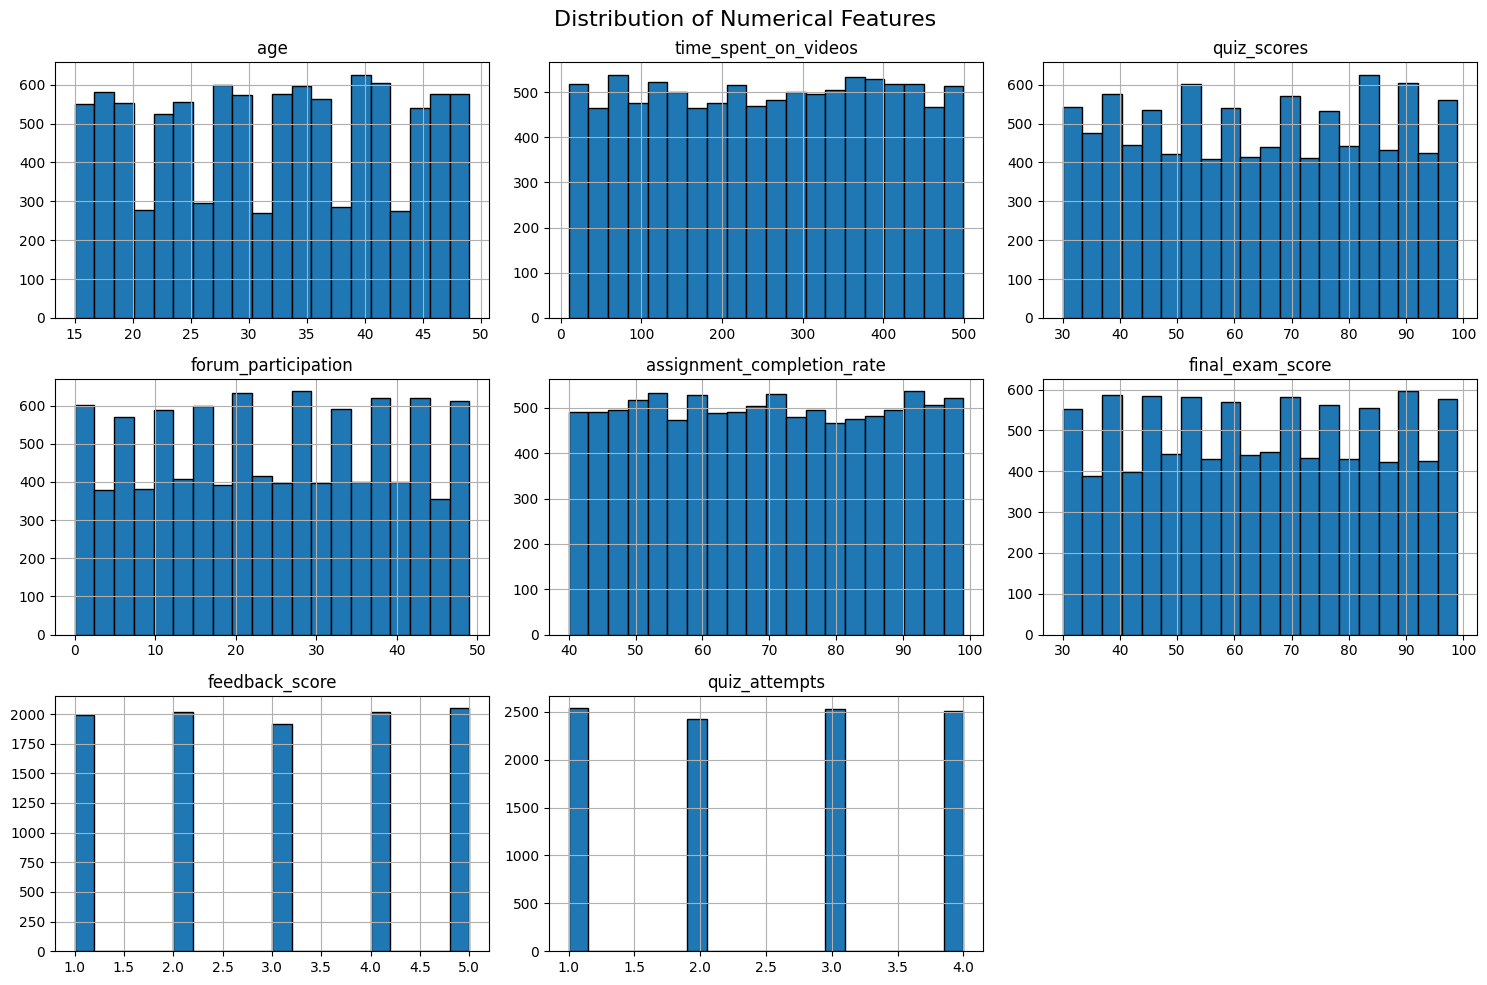

In [ ]:
numeric_cols = ['age', 'time_spent_on_videos', 'quiz_scores', 'forum_participation',
                'assignment_completion_rate', 'final_exam_score', 'feedback_score',
                'quiz_attempts']

df[numeric_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


### **Categorical Features**

### **Gender Distribution**

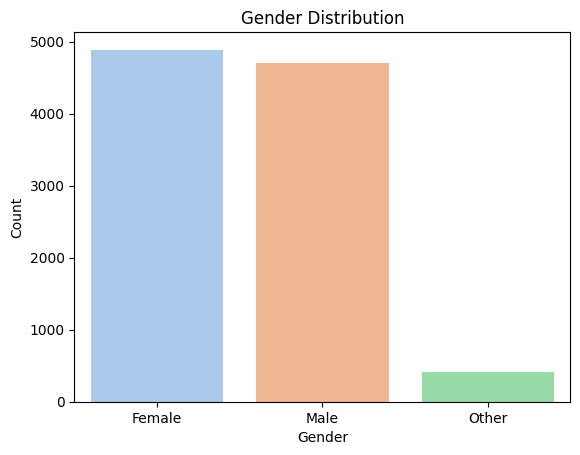

In [ ]:
sns.countplot(x='gender', data=df, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

### **Dropout Likelihood**

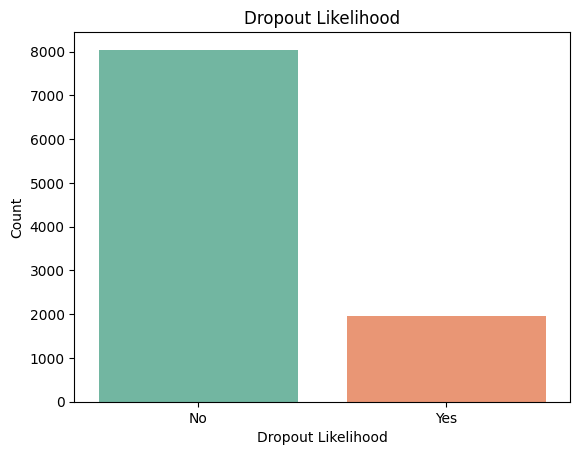

In [ ]:
sns.countplot(x='dropout_likelihood', data=df, palette='Set2')
plt.title("Dropout Likelihood")
plt.xlabel("Dropout Likelihood")
plt.ylabel("Count")
plt.show()


### **Engagement Level**

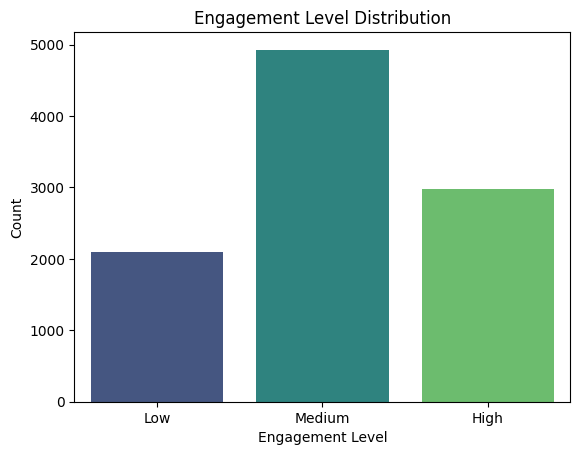

In [ ]:
sns.countplot(x='engagement_level', data=df, order=['Low', 'Medium', 'High'], palette='viridis')
plt.title("Engagement Level Distribution")
plt.xlabel("Engagement Level")
plt.ylabel("Count")
plt.show()


### **Education Level**

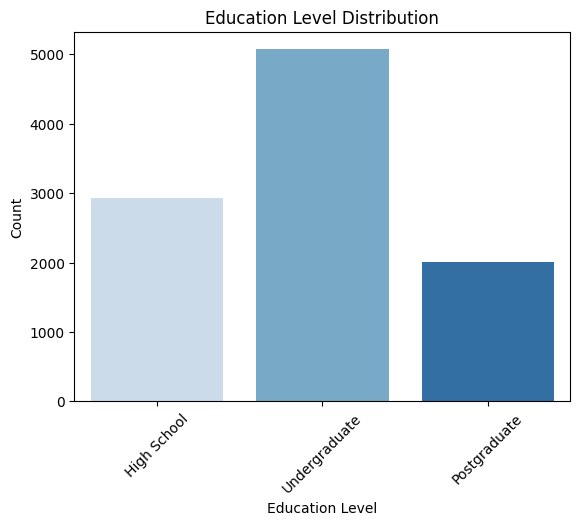

In [ ]:
sns.countplot(x='education_level', data=df, palette='Blues')
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


###  **Course Name**

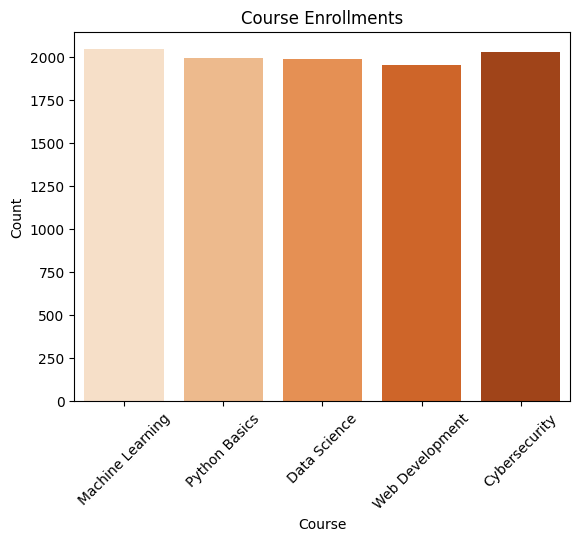

In [ ]:
sns.countplot(x='course_name', data=df, palette='Oranges')
plt.title("Course Enrollments")
plt.xlabel("Course")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### **Learning Style**

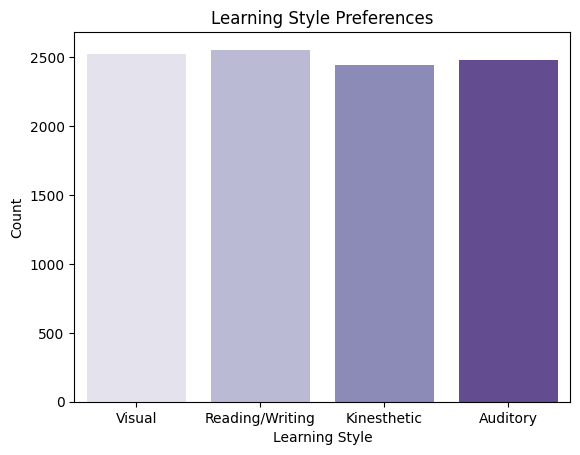

In [ ]:
sns.countplot(x='learning_style', data=df, palette='Purples')
plt.title("Learning Style Preferences")
plt.xlabel("Learning Style")
plt.ylabel("Count")
plt.show()


### **Age Group**

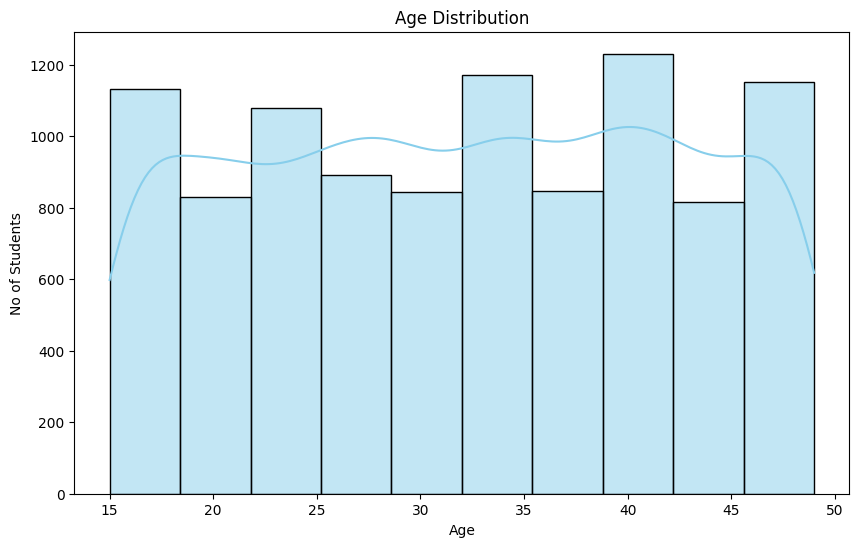

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True, edgecolor ='black', color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("No of Students")
plt.show()


## **Bivariate Analysis**

### **Dropout Likelihood by Gender**

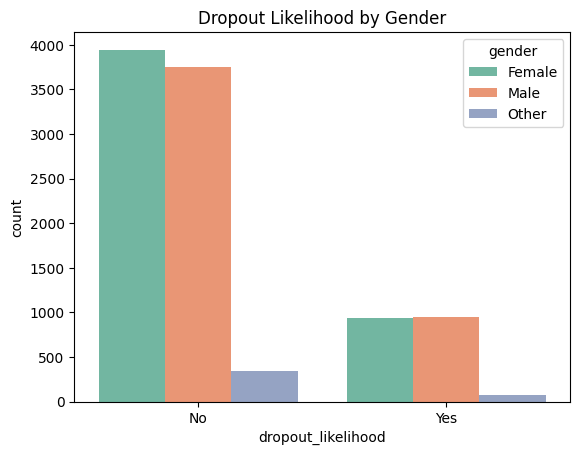

In [ ]:
sns.countplot(x='dropout_likelihood', hue='gender', data=df, palette='Set2')
plt.title("Dropout Likelihood by Gender")
plt.show()

### **Final Exam Score by Course Name**

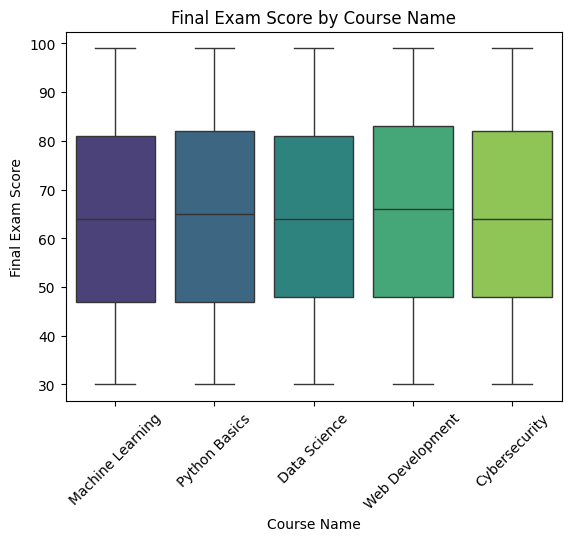

In [ ]:
sns.boxplot(x='course_name', y='final_exam_score', data=df, palette='viridis')
plt.title("Final Exam Score by Course Name")
plt.xlabel("Course Name")
plt.ylabel("Final Exam Score")
plt.xticks(rotation=45)
plt.show()

### **Learning Outcomes vs Learning Style**

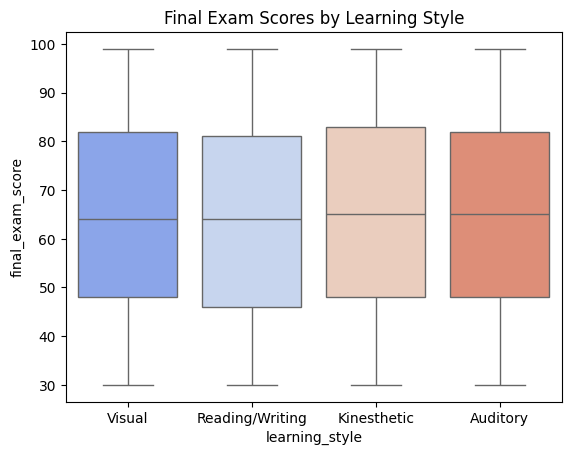

In [ ]:
sns.boxplot(x='learning_style', y='final_exam_score', data=df, palette='coolwarm')
plt.title("Final Exam Scores by Learning Style")
plt.show()


### **Dropout Likelihhod vs Education Level**

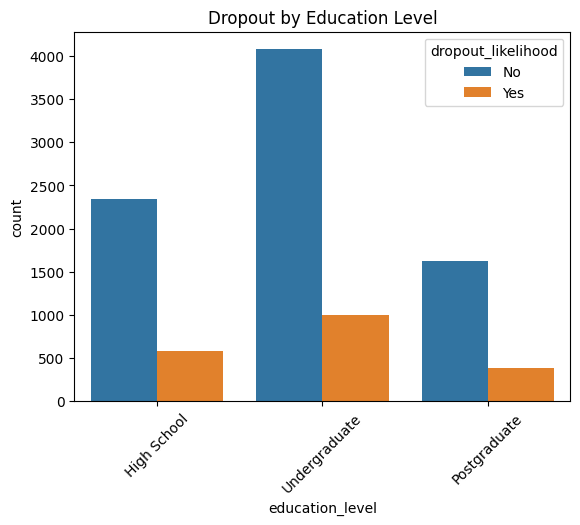

In [ ]:
sns.countplot(x='education_level', hue='dropout_likelihood', data=df)
plt.title("Dropout by Education Level")
plt.xticks(rotation=45)
plt.show()


### **Final Exam Score vs Quiz Score**

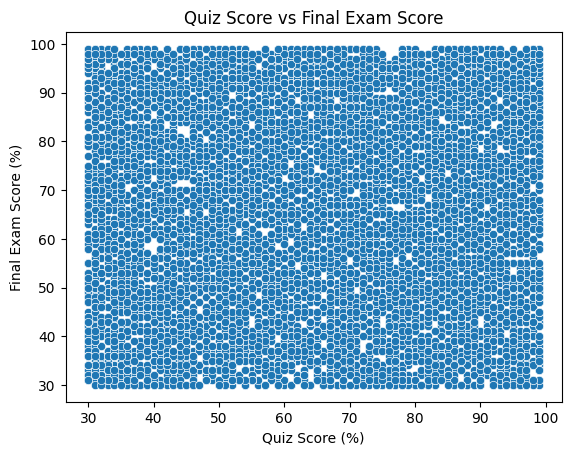

In [ ]:
sns.scatterplot(x='quiz_scores', y='final_exam_score', data=df)
plt.title("Quiz Score vs Final Exam Score")
plt.xlabel("Quiz Score (%)")
plt.ylabel("Final Exam Score (%)")
plt.show()


### **Engagement vs Final Score**

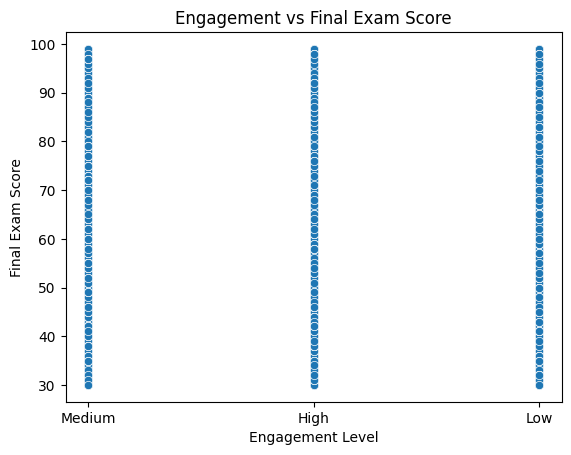

In [ ]:
sns.scatterplot(x='engagement_level', y='final_exam_score', data=df)
plt.title("Engagement vs Final Exam Score")
plt.xlabel("Engagement Level")
plt.ylabel("Final Exam Score")
plt.show()


### **Correlation Heatmap**

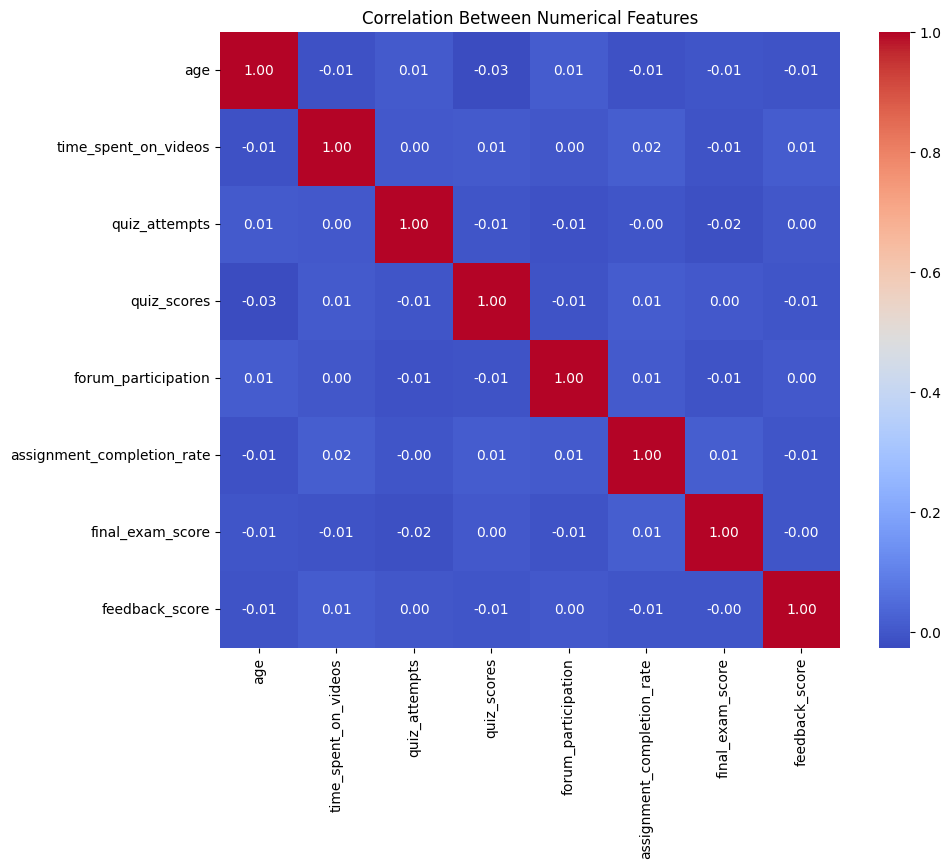

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numerical Features")
plt.show()


## **Save Cleaned Datasets**

In [ ]:
df.to_csv('/content/drive/MyDrive/results/cleaned_personalized_learning_dataset.csv', index = False)

## **Summary**

**Insights from Univariate Analysis**

1. The numeric features of the dataset are diverse and well-distributed.

2. Time spend on videos is slightly right-skewed. So, some users spend very little time watching videos.

3. Forum participation is spread out, but most users have low to moderate participation

4. Assignment completion rate is somewhat skewed towards higher completion, though it is not extreme.

5. Final exam scores and quiz scores are evenly spread out. Age also has a roughly uniform distribution.

6. Gender distribution is balanced between male and female. However, it is quite low for 'Other' category.

7. The dropout likelihood is low.

8. Engagement levels across groups is moderate in range.

9. Most learners are undergrads, followed by high-schoolers and postgrads.

10. Course enrollments and learning style preferences follow roughly an uniform distribution.

11. There is no bias towards a particular age group. Slight peaks observed at ages:
* 15 : likely high school students
* 35-40: possibly mid0-career upskill
* 50: older learners - either lifelong learners ot career changers



**Bivariate Analysis**

1. Dropout Likelihood by Gender: Female and Male students have simliar dropout scores. 'Other' gender has the fewest students, but also shows lower dropout. There is no strong correlation between gender and dropout likelihood,

2. Final Exam Score by Course Name: All courses have a similar median score at around 65. Web Development and Cybersecurity show slightly higher upper quartiles.

3. Final Exam Score by Learning Style: Median and spread of scores are very similar across all learning styles. So, learning styles does not influence final exam performance significantly.

4. Dropout by Education Level: Undergraduates make up the largest group of dropouts.

5. Quiz Score vs Final Score: There is no strong linear relationship between quiz score and final score.

6. Engagement Level vs Final Score: The scores are evenly spread across all engagement levels.

7. Correlation Matrix: Most correlation values are extremely close to 0. So, there is no strong linear relationship between the numeric features in the dataset.